# Problem 1

In [129]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

Suppose we have a floor made of parallel strips of wood, each of the same width. If we drop a needle on the floor, what is the probability that the needle will land on a line between two strips?

In [106]:
def buffon_needle(n,r,l,d): # n:number of needles , l:lenght of needle, d:distance between strips , r:number of runs
  for run in range(r):
    nhits = 0
    for num in range(n):
      x = random.uniform(0,d/2.0)
      angle = random.uniform(0,np.pi/2.0)
      x_cross = x -(l/2.0)*(np.cos(angle))
      if x_cross < 0 :
        nhits += 1
        
    probablity = ((nhits / n)*100)
        
    return(print('the probability that needles land on a line between two strips is', ' %.2f ' % probablity,'%'))


In [107]:
buffon_needle(4000,2000,2,3)

the probability that needles land on a line between two strips is  43.80  %


In [108]:
buffon_needle(10000,4000,4,9)

the probability that needles land on a line between two strips is  28.30  %


In [109]:
buffon_needle(20000,120000,5,10)

the probability that needles land on a line between two strips is  32.45  %


simulate and find Pi value using 100,1000,10000,100000 random needles and see if it how it converge.

In [110]:
def buffon_needle_pi(n,r,l,d): # n:number of needles , l:lenght of needle, d:distance between strips , r:number of runs
  for run in range(r):
    nhits = 0
    for num in range(n):
      x = random.uniform(0,d/2.0)
      angle = random.uniform(0,np.pi/2.0)
      x_cross = x -(l/2.0)*(np.cos(angle))
      if x_cross < 0 :
        nhits += 1

    pi_val = (2.0*l*n)/(nhits*d) 

    return(print('estimated value of pi for',n,'number of needles is',pi_val))


In [113]:
buffon_needle_pi(100,200000,5,10) #100 random needles

estimated value of pi for 100 number of needles is 2.9411764705882355


In [114]:
buffon_needle_pi(1000,200000,5,10) #1000 random needles

estimated value of pi for 1000 number of needles is 2.9673590504451037


In [115]:
buffon_needle_pi(10**4,200000,5,10) #10000 random needles

estimated value of pi for 10000 number of needles is 3.107520198881293


In [118]:
buffon_needle_pi(10**5,200000,5,10) #100000 random needles

estimated value of pi for 100000 number of needles is 3.1479207983127147


**so as we increase the number of random needles, we get closer to the real value of pi.**

In [119]:
#check the convergence
def buffon_needle_plot(n,r,l,d): # n:number of needles , l:lenght of needle, d:distance between strips , r:number of runs
  pi = []
  plt.axhline(y = np.pi, color='orange')
  for run in range(r):
    nhits = 0
    for num in range(n):
      x = random.uniform(0,d/2.0)
      angle = random.uniform(0,np.pi/2.0)
      x_cross = x -(l/2.0)*(np.cos(angle))
      if x_cross < 0 :
        nhits += 1

    pi_val = (2.0*l*n)/(nhits*d) 
    pi.append(pi_val)
  plt.plot(pi)

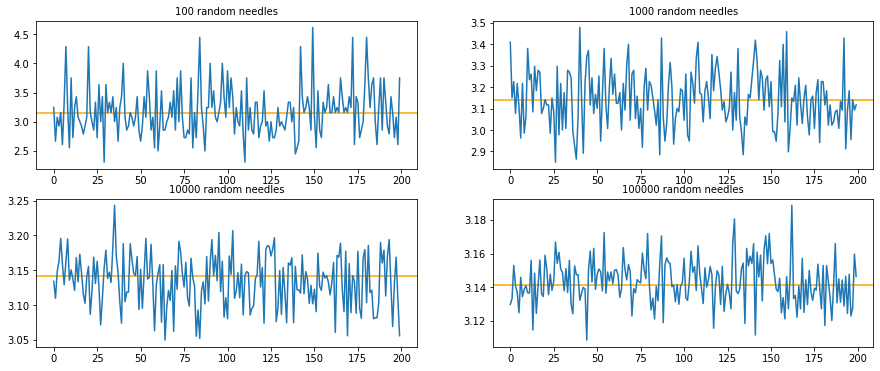

In [120]:
plt.figure(figsize=(15,6))

plt.subplot(221)
plt.title('100 random needles', size=10)
buffon_needle_plot(100,200,6,10)


plt.subplot(222)
plt.title('1000 random needles', size=10)
buffon_needle_plot(1000,200,6,10)

plt.subplot(223)
plt.title('10000 random needles', size=10)
buffon_needle_plot(10000,200,6,10)

plt.subplot(224)
plt.title('100000 random needles', size=10)
buffon_needle_plot(100000,200,6,10)

plt.show()

bouns point: show this process with animation 

In [13]:
#code here

# Problem 2

Let us compare the performance of the Monte Carlo integration to the regular midpoint method. Consider the integral:
<center>
    <br>$ \int^1 _0{dx \frac{3}{2} (1-x^2) } $</br>
</center>
<br></br>
Calculate the integral using:
<br></br>
a) The midpoint method, i.e. divide the integration range into N equal
intervals and evaluate the function at the midpoints of the intervals. Give
the answers (at least) for N = 10, 100, 1000, 10000.
<br></br>
b)Standard Monte Carlo integration, evaluating the function using the same
number of random points as in part a.
<br></br>
Compare the convergence of the methods towards the correct answer.                                   
now consider the integral in d-dimensional unit hypercube, with 
 $ \int_0^1{f(\overrightarrow{x}) = \Pi_1^d \frac{3}{2} (1-x_i ^2)} $ with $d = 10$. In this case the
midpoint method is evaluated at the center of a d-dim. hypercubes.)


In [121]:
import numpy as np
from scipy import random

In [122]:
# part a

def midpoint(N,a,b):
  def f(x):
    f = (3/2)*(1-x**2) #the function of the question
    return f
  value = 0 #initial value
  integration = 0 #initial value
  for n in range (1,N+1):
    x_mid = a+(2*n-1)*(b-a)/(2*N)
    value = value + f(x_mid) #sum up all the values
    
  integration = ((b-a)/N)*value  #final formula
   
  return integration

In [123]:
for i in [10,100,1000,10000]:
  m = midpoint(i,0,1)
  print(' the answer of midpoint integration with n =',str(i),'is',m)

 the answer of midpoint integration with n = 10 is 1.00125
 the answer of midpoint integration with n = 100 is 1.0000125000000002
 the answer of midpoint integration with n = 1000 is 1.0000001250000001
 the answer of midpoint integration with n = 10000 is 1.0000000012500014


In [124]:
# part b

def montecarlo(N,a,b):
  def f(x):
     f = (3/2)*(1-x**2) #the function of the question
     return f
  sample = np.zeros(N)
  for i in range(len(sample)):
    sample[i] = random.uniform(a,b)
  value = 0
  for i in range(N):
    value = value + f(sample[i])
  
  integration = (b-a)/float(N)*value
  return integration

In [126]:
for i in [10,100,1000,10000]:
  monte = montecarlo(i,0,1)
  print(' the answer of Monte Carlo integration with n =',str(i),'is',monte)

 the answer of Monte Carlo integration with n = 10 is 1.0979310632205368
 the answer of Monte Carlo integration with n = 100 is 1.0161154870824876
 the answer of Monte Carlo integration with n = 1000 is 1.0285932138712186
 the answer of Monte Carlo integration with n = 10000 is 0.9964687989206967


**according to answers of part (a) and part (b), the convergence of the midpoint method is better than the monte Carlo method cause its numbers are closer together and they're not much different. however, in the monte Carlo method, this is not satisfied because numbers are just random samples.**

# Problem 3

Estimate the volume of a d-dimensional sphere, with (at least) d = 2 and 3,
using the hit-and-miss method. Use N = 10000 random vectors

In [127]:
def hitmiss(N,d):
  N_hit = 0   #initial value of hit points
  for i in range(N): 
    x = np.random.uniform(0, 1, d)  #generating random numbers
    r = 0 
    for j in range(d):
      r += x[j]**2  #generating vector of d random numbers
    radius = np.sqrt(r)  #calculating the distance from origin
    if radius <= 1 : # chech that generated numbers are in the sphere or not
      N_hit += 1

  volume = 2**d*N_hit/N #formula of the volume of sphere by this method
  return volume
    

In [128]:
for i in [2,3,4,5]:
  vol = hitmiss(10**4,i)
  print(' the volume of a',str(i),'dimensional sphere is',vol)

 the volume of a 2 dimensional sphere is 3.124
 the volume of a 3 dimensional sphere is 4.1944
 the volume of a 4 dimensional sphere is 4.984
 the volume of a 5 dimensional sphere is 5.2384


# Problem 4 

Generate uniformly distributed random points on a sphere using spherical coordinates.
And then plot the generated poins on a d = 3 dimensional plot.Take notice that using uniform
random ditributions for both θ and φ, will not result in uniformly distributed random chosen
points on the sphere.


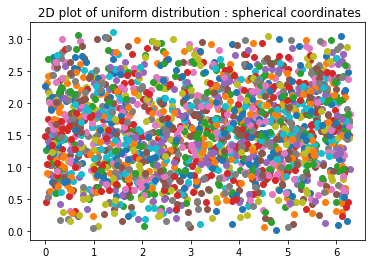

In [130]:
for i in range(2000):
  u = random.random() 
  v = random.random() 
  theta = 2 * math.pi  * u 
  phi = math.acos( 2 * v - 1 )
  plt.title(' 2D plot of uniform distribution : spherical coordinates')
  plt.scatter(theta,phi)


In [101]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

num = 2000 # number of points
dim = 3  # dimension
sample_points = np.random.normal(size=(dim,num))  # darray with shape (dim,N)
radius = np.sqrt((sample_points**2).sum(axis=0)) # the consequent magnitude of arrays which is radius of different sample points
sphere_points = sample_points/radius # normalize the sample points due to the dividing them by radius

phi = np.linspace(0, np.pi,15)
theta = np.linspace(0, 2 * np.pi,15)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

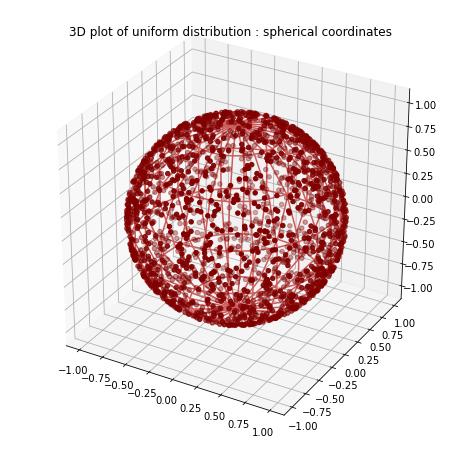

In [104]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8,8))
ax.scatter(*sphere_points, color = 'maroon')
ax.plot_wireframe(x, y, z, color = 'indianred')
plt.title('3D plot of uniform distribution : spherical coordinates')
plt.show()